# 10 January 

## Objective:
Use Python to perform a simple linear regression analysis on Canada's per capita income data,
split the data into training and testing sets, and evaluate the model. The data in .doc file is
available in VTOP.

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Regression Analysis and Predictive Models Lab\10_jan\data.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [4]:
df['year'] = df['year'].astype('int')

## Visualizing the data

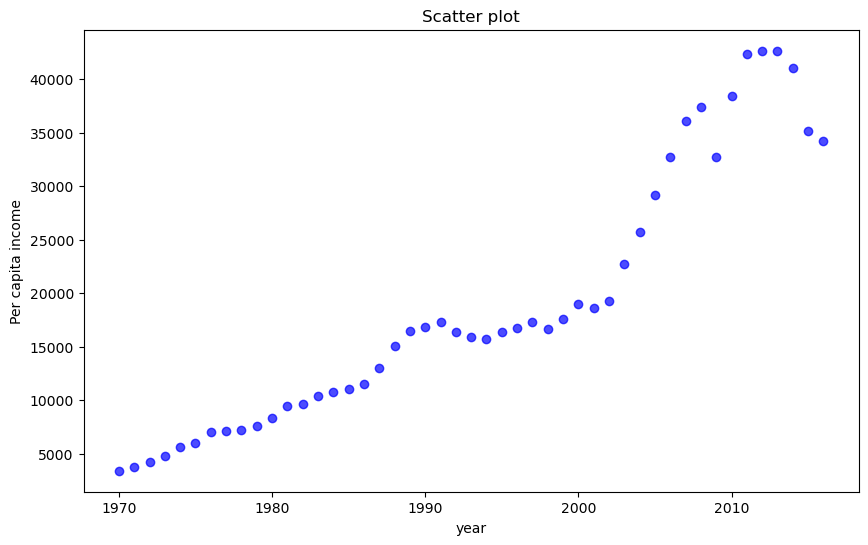

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(df['year'],df['per capita income (US$)'],color = 'blue', alpha=0.7)
plt.xlabel('year')
plt.ylabel("Per capita income")
plt.title("Scatter plot")
plt.show()

## Preparing the data for modelling

In [6]:
x = df['year'].values.reshape(-1,1)
y = df['per capita income (US$)'].values

## Splitting the data into training and testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Building,Training model and predicting

In [8]:
model = LinearRegression()
model.fit(x_train,y_train)

income_2025 = model.predict([[2025]])
print(f"Predicted per capita income for 2025: ${income_2025[0]:,.2f}")

Predicted per capita income for 2025: $45,103.39


In [9]:
y_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test,y_pred)
# Calculate the R-squared value on the testing set
r2_test = model.score(x_test,y_test)
print(f"Testing Set Mean Squared Error: {mse_test:.2f}")
print(f"Testing Set R-squared: {r2_test:.2f}")

Testing Set Mean Squared Error: 15147815.55
Testing Set R-squared: 0.88


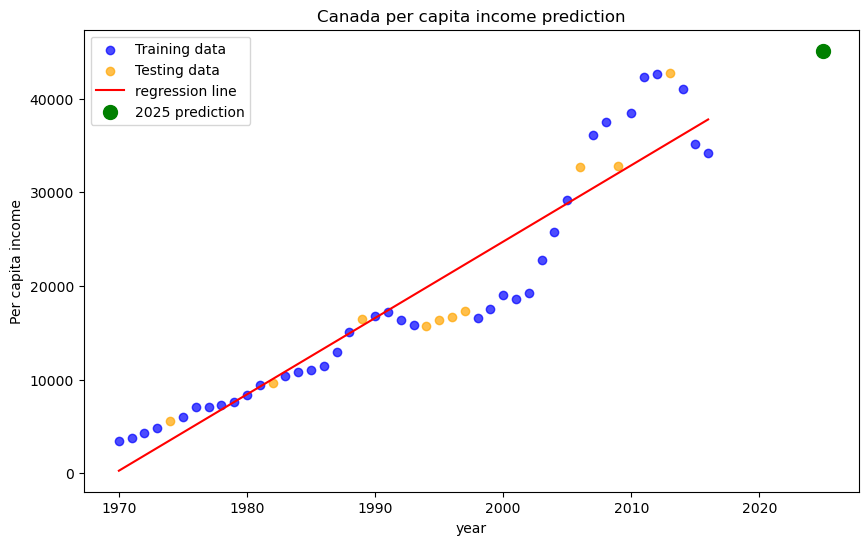

In [10]:
# visualizing the training data, test data, and the regression model
plt.figure(figsize = (10,6))
#scatter plot of training data
plt.scatter(x_train,y_train,color = 'blue',label = 'Training data', alpha=0.7)
#scatter plot of testing data
plt.scatter(x_test,y_test,color = 'orange',label = 'Testing data', alpha=0.7)
#ploting the regresssion line 
plt.plot(x,model.predict(x),color = 'red',label = 'regression line')
plt.scatter([[2025]], income_2025,color = 'green',label = '2025 prediction', zorder = 5, marker = 'o', s = 100)
plt.xlabel('year')
plt.ylabel("Per capita income")
plt.title("Canada per capita income prediction")
plt.legend()
plt.show()

In [11]:
print("Regression Coefficient (slope):",model.coef_[0])
print("Regression Intercept:",model.intercept_)

Regression Coefficient (slope): 815.1425130089494
Regression Intercept: -1605560.1987964248
